| Field | Value |
|-|-|
| simulation file | sjostrom_vary.py |
| result files prefix | sjostrom |
| # result files | 3\*2\*2\*5\*2\*5 = 600 |
| simulation start | 2015-08-12 10:57:01 |
| simulation end | 2015-08-12 11:14:09 |
| duration | 0:17:08 |
| repository | https:/ |
| revision hash | [a3377e528efedbd7d14906abedc195b4b05880f2](https://tree/a3377e528efedbd7d14906abedc195b4b05880f2) |

In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
%pylab inline
import cPickle
from helper import PeriodicAccumulator, BooleanAccumulator
from itertools import product

Populating the interactive namespace from numpy and matplotlib


In [3]:
def get(vary, h1, l_f, freq, delta, i):
    return cPickle.load(open('sjostrom_vary_{0}_h1_{1}_l_f_{2}_freq_{3}_delta_{4}_i_{5}.p'.format(vary, h1, l_f, freq, delta, i),'rb'))


vary_s = [str(a) for a in ['alpha', 'beta', 'r_max']]
h1_s = [str(a) for a in [False, True]]
l_f_s = [str(a) for a in [1.0, 10.0]]
freq_s = [str(a) for a in array([  1.,  10.,  20.,  40.,  50.])]
delta_s = [str(a) for a in array([-10.,  10.])]
i_s = [str(a) for a in [0, 1, 2, 3, 4]]


params = list(product(vary_s, h1_s, l_f_s, freq_s, delta_s, i_s))

data = {tup:get(*tup) for tup in params}

In [4]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
from IPython.display import clear_output, display, HTML

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [5]:
import random
r = lambda: random.randint(0,255)
colors = ['#%02X%02X%02X' % (r(),r(),r()) for _ in range(5)]
print colors

['#105602', '#F9F819', '#335ECF', '#12C2F1', '#0FF703']


In [6]:
def show_plot(vary, h1, l_f):
    figure(figsize=(12,5))
    for i in i_s:
        for delta in delta_s:
            dws = zeros(len(freq_s))
            for idx, freq in enumerate(freq_s):
                p = (vary, h1, l_f, freq, delta, i)
                curr = data[p][0]
                dws[idx] = curr.res['weights'][-1] / curr.res['weights'][0]
            plot([float(a) for a in freq_s], dws, c=colors[int(i)])
    plot([0,50],[1,1],'k--')


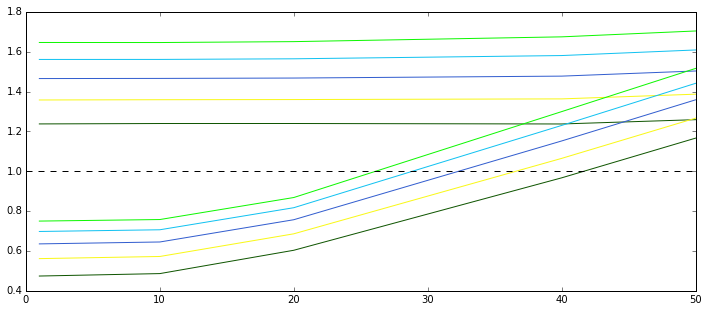

In [7]:
ts = data[params[0]][0].t
i = interact(show_plot,
key=widgets.ToggleButtons(description='key',options=['dendr_pred','weights','weight_updates', 'PIVs', 'y','h']),
t_min=(0,int(np.round(ts[-1]))),
t_max=(0,int(np.round(ts[-1]))),
vary=widgets.ToggleButtons(description='vary',options=vary_s),
h1=widgets.ToggleButtons(description='h1',options=h1_s),
l_f=widgets.ToggleButtons(description='l_f',options=l_f_s),
freq=widgets.ToggleButtons(description='freq',options=freq_s),
delta=widgets.ToggleButtons(description='delta',options=delta_s),
i=widgets.ToggleButtons(description='i',options=i_s),
y_c=widgets.ToggleButtons(description='y_c',options=[str(a) for a in range(5)]))
